In [1]:
import pandas as pd

In [32]:
ad=pd.read_csv('advertising.csv')

In [3]:
ad.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
ad.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

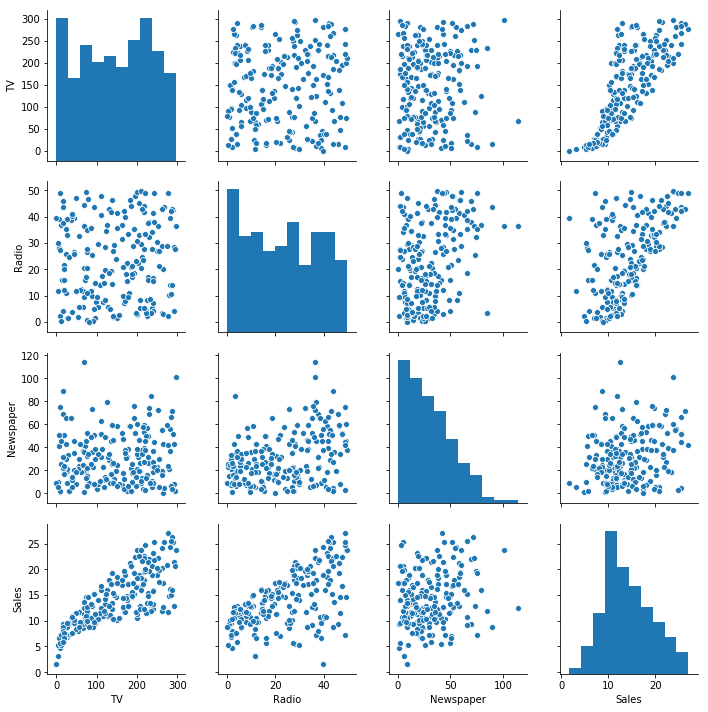

In [9]:
sns.pairplot(ad)

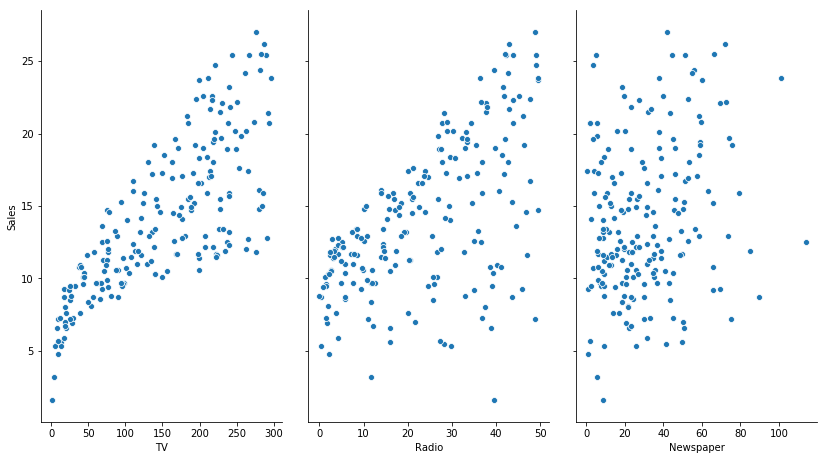

In [81]:
sns.pairplot(ad, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=6.5, aspect=0.6, kind='scatter')

In [82]:
x = ad[['TV','Radio','Newspaper']]
y = ad['Sales']

In [83]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

/home/bhavesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [93]:
y_pred = lm.predict(x_test)

In [94]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [96]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.8506819941636972
r_square_value : 0.9058622107532245


In [97]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train,X_train_sm).fit()
lm_1.params

/home/bhavesh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [98]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           9.97e-66
Time:                        21:29:52   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

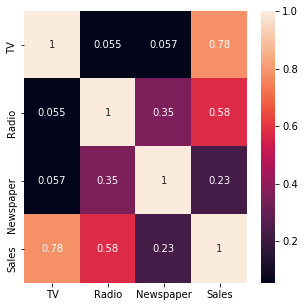

In [99]:
plt.figure(figsize = (5,5))
sns.heatmap(ad.corr(),annot = True)

In [100]:
x_train_new = x_train[['TV','Radio']]
x_test_new = x_test[['TV','Radio']]

In [101]:
lm.fit(x_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
y_pred_new = lm.predict(x_test_new)

Text(0, 0.5, 'Sales')

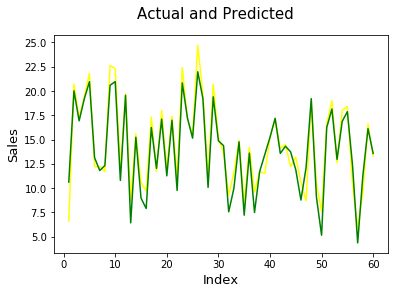

In [103]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="yellow", linewidth=1.5)
plt.plot(c,y_pred, color="green",  linewidth=1.5)
fig.suptitle('Actual and Predicted', fontsize=15)            
plt.xlabel('Index', fontsize=13)                            
plt.ylabel('Sales', fontsize=13)                        

Text(0, 0.5, 'ytest-ypred')

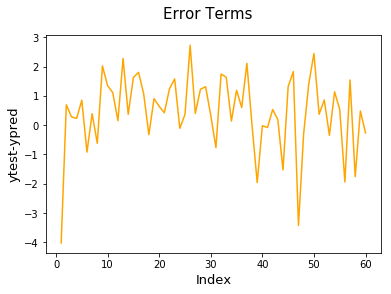

In [104]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="orange", linewidth=1.5)
fig.suptitle('Error Terms', fontsize=15)        
plt.xlabel('Index', fontsize=13)        
plt.ylabel('ytest-ypred', fontsize=13)   

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [106]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.784740052090281
r_square_value : 0.909216449171822


In [107]:
x_train_final = x_train_new 
x_train_final = sm.add_constant(x_train_final)
lm_final = sm.OLS(y_train,x_train_final).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           4.46e-67
Time:                        21:29:55   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

/home/bhavesh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
